# Poisson's Equation
Sean Wade

In [1]:
from __future__ import division
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from scipy import sparse as sparse
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

In [2]:
%matplotlib inline

In [3]:
from __future__ import division
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

def poisson_square(a1,b1,c1,d1,n,bcs, source):
    # n = number of subintervals
    # We discretize in the x dimension by
    # a1 = x_0 < x_1< ... < x_n=b1, and
    # We discretize in the y dimension by
    # c1 = y_0 < y_1< ... < y_n=d1.
    # This means that we have interior points
    # {x_1, ..., x_{n-1}}\times {y_1, ..., y_{n-1}}
    # or {x_1, ..., x_m}\times {y_1, ..., y_m} where m = n-1.
    # In Python, this is indexed as
    # {x_0, ..., x_{m-1}}\times {y_0, ..., y_{m-1}}
    # We will have m**2 pairs of interior points, and
    # m**2 corresponding equations.
    # We will organize these equations by their
    # y coordinates: all equations centered
    # at (x_i, y_0) will be listed first,
    # then (x_i, y_1), and so on till (x_i, y_{m-1})
    delta_x, delta_y, h, m = (b1-a1)/n, (d1-c1)/n, (b1-a1)/n, n-1
    
    #### Construct the matrix A ####
    I = np.ones((n-1)*(n-2))
    I_off_up = np.ones((n-1)**2-1)
    I_off_low = np.ones((n-1)**2-1)
    I_off_low[n-2::n-1] = 0
    I_off_up[n-1::n-1] = 0
    diags = np.array([I, I_off_low, -4*np.ones((n-1)**2), I_off_up, I])
    k = [-(n-1), -1, 0, 1, (n-1)]
    A = sp.diags(diags, k)
    A = A / h**2
    
    #### Here we construct the vector b ####
    b, Array = np.zeros(m**2), np.linspace(0.,1.,m+2)[1:-1]
    # In the next line, source represents
    # the inhomogenous part of Poisson✬s equation
    for j in xrange(m):
        b[j*m:(j+1)*m] = source(a1+(b1-a1)*Array, c1+(j+1)*h*np.ones(m) )
        
    # In the next four lines, bcs represents the
    # Dirichlet conditions on the boundary
    # y = c1+h, d1-h
    b[0:m] -= h**(-2.)*bcs(a1+(b1-a1)*Array,c1*np.ones(m))
    b[(m-1)*m:m**2] -= h**(-2.)*bcs(a1+(b1-a1)*Array,d1*np.ones(m))
    
    # x = a1+h, b1-h
    b[0::m] -= h**(-2.)*bcs(a1*np.ones(m),c1+(d1-c1)*Array)
    b[(m-1)::m] -= h**(-2.)*bcs(b1*np.ones(m),c1+(d1-c1)*Array)
    
    #### Here we solve the system A*soln = b ####
    soln = spsolve(A,b)
    
    # We return the solution, and the boundary values,
    # in the array z.
    z = np.zeros((m+2,m+2) )
    for j in xrange(m):
        z[1:-1,j+1] = soln[j*m:(j+1)*m]
        
    x, y = np.linspace(a1,b1,m+2), np.linspace(c1,d1,m+2)
    z[:,0], z[:,m+1] = bcs(x,c1*np.ones(len(x)) ), bcs(x,d1*np.ones(len(x)) )
    z[0,:], z[m+1,:] = bcs(a1*np.ones(len(x)),y), bcs(b1*np.ones(len(x)),y)
    return z

In [4]:
def source(X,Y):
    """
    Takes arbitrary arrays of coordinates X and Y and returns an array of the ←-
    same shape
    representing the charge density of nested charged squares
    """
    src = np.zeros(X.shape)
    src[ np.logical_or(
            np.logical_and( np.logical_or(abs(X-1.5) < .1,abs(X+1.5) < .1) ,abs(Y) < 1.6),
            np.logical_and( np.logical_or(abs(Y-1.5) < .1,abs(Y+1.5) < .1) ,abs(X) < 1.6))] = 1
    src[ np.logical_or( 
            np.logical_and( np.logical_or(abs(X-0.9) < .1,abs(X+0.9) < .1) ,abs(Y) < 1.0),
            np.logical_and( np.logical_or(abs(Y-0.9) < .1,abs(Y+0.9) < .1) ,abs(X) < 1.0))] = -1
    return src

## Problem 1

//anaconda/lib/python2.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


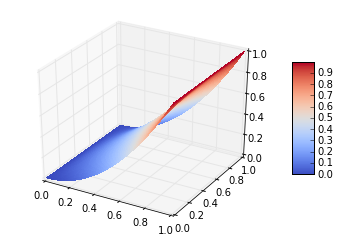

In [5]:
a1 = 0.
b1 = 1.
c1 = 0.
d1 = 1.
n = 100
X = np.linspace(a1,b1,n+1)
Y = np.linspace(c1,d1,n+1)
X,Y = np.meshgrid(X,Y)
def bcs(x, y):
    return x**2
def source_func(x, y):
    return 0.0 * x

fig = plt.figure()
ax = fig.gca(projection='3d')
Z = poisson_square(a1,b1,c1,d1,n,bcs, source_func)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
surf = ax.plot_surface(X.T, Y.T, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Problem 2

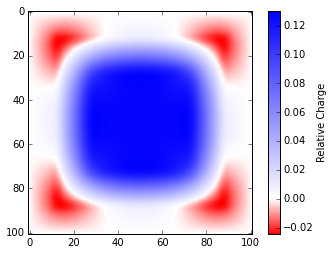

In [6]:
def source(X,Y):
    """
    Takes arbitrary arrays of coordinates X and Y and returns an array of the ←-
    same shape
    representing the charge density of nested charged squares
    """
    src = np.zeros(X.shape)
    src[ np.logical_or(
            np.logical_and( np.logical_or(abs(X-1.5) < .1,abs(X+1.5) < .1) ,abs(Y) < 1.6),
            np.logical_and( np.logical_or(abs(Y-1.5) < .1,abs(Y+1.5) < .1) ,abs(X) < 1.6))] = 1
    src[ np.logical_or( 
            np.logical_and( np.logical_or(abs(X-0.9) < .1,abs(X+0.9) < .1) ,abs(Y) < 1.0),
            np.logical_and( np.logical_or(abs(Y-0.9) < .1,abs(Y+0.9) < .1) ,abs(X) < 1.0))] = -1
    return src

    #Generate a color dictionary for use with LinearSegmentedColormap
    #that places red and blue at the min and max values of data
    #and white when data is zero
    
def genDict(data):
    zero = 1/(1 - np.max(data)/np.min(data))
    cdict = {'red': [(0.0, 1.0, 1.0),
    (zero, 1.0, 1.0),
    (1.0, 0.0, 0.0)],
    'green': [(0.0, 0.0, 0.0),
    (zero, 1.0, 1.0),
    (1.0, 0.0, 0.0)],
    'blue': [(0.0, 0.0, 0.0),
    (zero, 1.0, 1.0),
    (1.0, 1.0, 1.0)]}
    
    return cdict

a1 = -2.
b1 = 2.
c1 = -2.
d1 = 2.
n =100
s = poisson_square(a1 ,b1 ,c1 ,d1 ,n ,source_func, source)
plt.imshow(s,cmap = mcolors.LinearSegmentedColormap('cmap', genDict(s)))
plt.colorbar(label="Relative Charge")
plt.show()